In [1]:
import os
import rich
from scipy import interpolate

import numpy as np
import pandas

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
joint_list = [
    "Nose", "Head", "Left Ear",
    "Right Ear", "Trunk", "Tail Base",
    "Tail_tip", "t0", "t1", "t2",
    "neck", "Left Hpaw", "Right Hpaw",
    "Left Fpaw", "Right Fpaw"
]

In [3]:
data_path = "/mnt/cup/people/tt1131/projects/rotation_project_spring/tracks_evaluation/"
condition_list = ["sham_gdx", "testosterone", "gdx", "intact"]
sample_dict = np.load(
    os.path.join(data_path, f"{condition_list[-1]}_track_dict_abrv.npy"),
    allow_pickle=True,
).item()

In [4]:
track_occupancy_list = []
locations_list = []
joint_scores_list = []

for dict_key in sample_dict.keys():
    t_o = sample_dict[dict_key][3]
    loc = sample_dict[dict_key][4]
    js = sample_dict[dict_key][5]
    track_occupancy_list.append(t_o)
    joint_scores_list.append(js)
    locations_list.append(loc)

In [20]:
import copy
from skimage.measure import label
from einops import rearrange
from rich.progress import track

joint_missing = []

for j in np.arange(len(joint_list)):
    joint_missing.append([])

for j_loc in track(locations_list):
    joint_null_count = copy.deepcopy(j_loc)[:, :, 0, 0]
    for i in range(joint_null_count.shape[1]):
        nan_idx = np.argwhere(np.isnan(j_loc[:, 0]))
        j_loc[~nan_idx, i] = 0
        j_loc[nan_idx, i] = 1
        
        connected = label(joint_null_count[:, i])
        ccs = [np.argwhere(connected == i).squeeze() for i in range(connected.max())]
        joint_missing[i].append(np.array([np.size(cc) for cc in ccs])[1:])

Output()

mean: 1.3944558823788116, medain: 1.0, std: 4.201138012389633, 75% quantile: 1.0


(0.0, 40.0)

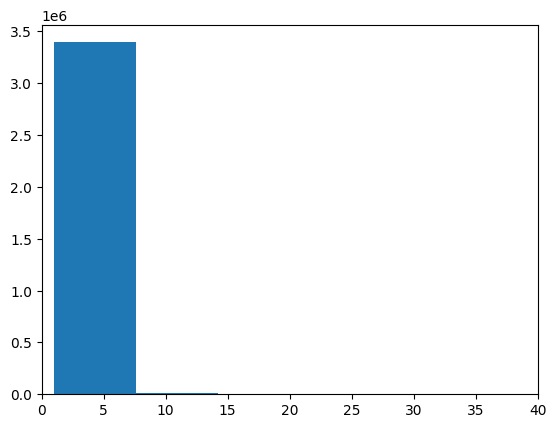

In [17]:
joint_missing_np = np.concatenate(joint_missing)
print(f"mean: {np.mean(joint_missing_np)}, medain: {np.median(joint_missing_np)}, std: {np.std(joint_missing_np)}, 75% quantile: {np.quantile(joint_missing_np, 0.75)}")
_ = plt.hist(joint_missing_np, bins=500)
plt.xlim(0, 40)